# Проект: Принятие решений в бизнесе

<b>Часть 1. Приоритизация гипотез.</b>

<p>Цели: </p>
<p>Применить фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.</p>
<p>Применить фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.</p>
<p>Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.</p>

<b>Часть 2. Анализ A/B-теста</b>

<p>Цели:</p>
<p>-  Построить график кумулятивной выручки по группам. Сделать выводы и предположения.</p>
<p>-  Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.</p>
<p>-  Построить график относительного изменения кумулятивного среднего чека группы B к группе A. </p>
<p>-  Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.</p>
<p>-  Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.</p>
<p>-  Построить точечный график количества заказов по пользователям. Сделайть выводы и предположения.</p>
<p>-  Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.</p>
<p>-  Построить точечный график стоимостей заказов. Сделать выводы и предположения.</p>
<p>-  Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.</p>
<p>-  Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.</p>
<p>-  Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.</p>
<p>-  Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.</p>
<p>-  Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.</p>

## Предваритальная обработка данных

In [1]:
# загрузим библиотеки для исследования 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np    
from scipy import stats as st
import seaborn as sns
from IPython.display import display
import datetime as dt
from pandas.plotting import register_matplotlib_converters

In [2]:
# Загрузка датафреймов
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('D:\\Python\\hypothesis.csv')
    orders = pd.read_csv('D:\\Python\\orders.csv')
    visitors = pd.read_csv('D:\\Python\\visitors.csv')

In [3]:
# посмотрим информацию о следующем датафрейме
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [4]:
# Названия колонок датасета hypothesis приведем к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
#посмотрим на количество пропусков
hypothesis.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

In [6]:
# проверим количество дубликатов в датасете 
hypothesis.duplicated().sum()

0

In [7]:
# посмотрим информацию о следующем датафрейме
orders.head()


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
#преобразуем дату в другой формат
orders["date"] = orders["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [11]:
#посмотрим на количество пропусков
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [12]:
# проверим количество дубликатов в датасете 
orders.duplicated().sum()

0

In [13]:
#выявим максимальную дату
print('максимальная дата:',orders['date'].max())

максимальная дата: 2019-08-31 00:00:00


In [14]:
#выявим минимальную дату
print('минимальная дата:',orders['date'].min())

минимальная дата: 2019-08-01 00:00:00


In [15]:
#выявим максимальную выручку
print('максимальная выручка:',orders['revenue'].max())

максимальная выручка: 1294500


In [16]:
#выявим минимальную выручку
print('минимальная выручка:',orders['revenue'].min())

минимальная выручка: 50


In [17]:
# посмотрим информацию о следующем датафрейме
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [18]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [19]:
#преобразуем дату в другой формат
visitors["date"] = visitors["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [20]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [21]:
#посмотрим на количество пропусков
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [22]:
# проверим количество дубликатов в датасете 
visitors.duplicated().sum()

0

In [23]:
#выведем максимальное количество пользователей в определенную дату 
print('максимальное количество пользователей:',visitors['visitors'].max())

максимальное количество пользователей: 770


In [24]:
#выведем минимальное количество пользователей в определенную дату 
print('минимальное количество пользователей:',visitors['visitors'].min())

минимальное количество пользователей: 361


<b>Подвывод</b>
<p>После преваритальной обработки данных было выявлено, что в датасетах hypothesis, orders, visitors отсутствуют пропуски, дубликатов тоже нет. </p>

<b>Часть 1. Приоритизация гипотез</b>

In [25]:
#Применим фреймворк ICE для приоритизации гипотез
pd.options.display.max_colwidth = 1
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis['ICE'] = np.round(hypothesis['ICE'], 2)
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False),0)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


0

In [26]:
#Применим фреймворк RICE для приоритизации гипотез.
pd.options.display.max_colwidth = 1
hypothesis ['RICE'] = hypothesis ['reach'] * hypothesis ['impact'] * hypothesis ['confidence'] / hypothesis ['efforts']
display(hypothesis [['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<b>Подвывод</b>
<p>-  При применении фреймворка ICE - наиболее перспективные гипотезы 8,0,7 и 6. <p>
<p>-  При применении фреймворка RICE наиболее перспективными становятся гипотезы 7,2,0 и 6. Гипотеза 7 стала на первом месте в фреймворке RICE в связи с тем, что ее параметр Reach максимальный и равен 10, у гипотезы 2 параметр Reach также довольно велик и равен 8.<p>
    Хорошо видно различие в обеих таблицах. Главное меняется тройка лидеров : если в ICE это гипотезы с индексами 8, 0, 7 , то в RICE - 7 была на 3 меcте, 2 была на 5, 0 на 2, а лидер таблицы ICE - 8 сместился аж на пятую позицию, в то время как 2 перешел на второе место с пятого. Такое отличие обусловлено тем, что в фреймворке RICE мы учитываем важный параметр - это Reach (на какое количество людей в течение определенного периода времени мы повлияем), и в гипотезах 7 и 2 он очень высок (в 7 он равен 10 - максимальный, а в 2 он равен 8 - также высокий, а в лидере ICE - в 8 он минимальный и равен 1).

<b>Часть 2. Анализ A/B-теста</b>

In [27]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Определим, сколько у нас групп в А/В тесте - важно понять, парный он или множественный

In [90]:
orders['group'].value_counts()

B    548
A    468
Name: group, dtype: int64

Выясним дату начала и окончания теста - не помешает в целом понимание временных рамок теста

In [91]:
mini = orders['date'].min()
maxi = orders['date'].max()
print ('датa начала теста: ', mini, ' , ', 'a вот дата окончания теста: ', maxi)

датa начала теста:  2019-08-01 00:00:00  ,  a вот дата окончания теста:  2019-08-31 00:00:00


Очень важно также проверить, нет ли в данных пользователей, участвовавших в нескольких группах теста одновременно - это иногда случается в реальных А/В тестах из-за технических ошибок в распределяющей системе, и такие моменты важно отлавливать, потому что пользователи, участвующие в нескольких группах, не позволят проверсти корректное сравнение среднего количества заказов на посетителя между группами: если, например, пользователь, участвующий в обоих группах, совершил целевое событие, мы не сможем оценить, повлияло это нововведение в системе, или это стандартное поведение пользователя.

In [28]:
#Проверим нет ли пользователей, участвовавших в нескольких группах одновременно
usersA = orders[orders['group'] == 'A']
usersB = orders[orders['group'] == 'B']
usersAB = usersA.merge(usersB, on='visitorId', how = 'inner')
usersAA = list(usersAB["visitorId"].unique())
print(len(usersAA))

58


In [29]:
#Посчитаем количество заказов таких пользователей
orders_dup = orders.query('visitorId in @usersAA')
print(len(orders_dup))

181


In [30]:
#нужно удалить такие заказы, чтобы они не испортили статистику
orders = orders.query('visitorId not in @usersAA').reset_index(drop=True)

In [31]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups.head()

,date,group
0,2019-08-15,B
6,2019-08-15,A
35,2019-08-16,A
37,2019-08-16,B
45,2019-08-01,A


In [32]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated

,date,group,revenue
45,2019-08-01,A,142779
54,2019-08-01,B,59758
149,2019-08-02,A,234381
147,2019-08-02,B,221801
245,2019-08-03,A,346854
...,...,...,...
456,2019-08-29,B,4746610
645,2019-08-30,A,3311413
589,2019-08-30,B,4955833
820,2019-08-31,A,3364656


Построим график кумулятивной выручки по группам

In [33]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,3797467345,1196621759,2019-08-15,9759,B
3,2282983706,2322279887,2019-08-15,2308,B
4,182168103,935554773,2019-08-15,2210,B


In [34]:
#Рассчитаем усредненную (по медиане) выручку за день в каждой группе
orders.groupby(['date','group'])['revenue'].sum().groupby('group').median()

group
A    92365.0 
B    107340.0
Name: revenue, dtype: float64

In [35]:
#Сравним идентичны ли даты и группы в таблицах посетителей и заказов 
orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)

,date,group
0,2019-08-01,A
1,2019-08-01,B
2,2019-08-02,A
3,2019-08-02,B
4,2019-08-03,A
...,...,...
57,2019-08-29,B
58,2019-08-30,A
59,2019-08-30,B
60,2019-08-31,A


In [36]:
compare_aA = orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True) == \
                        visitors[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)
compare_aA

,date,group
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
57,True,True
58,True,True
59,True,True
60,True,True


In [37]:
compare_aA['date'].sum() , compare_aA['group'].sum() 

(62, 62)

Все пары дата-группа в таблицах посетители и заказы совпадают

In [38]:
#Создадим таблицу куммулятивных данных по обеим таблицам
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


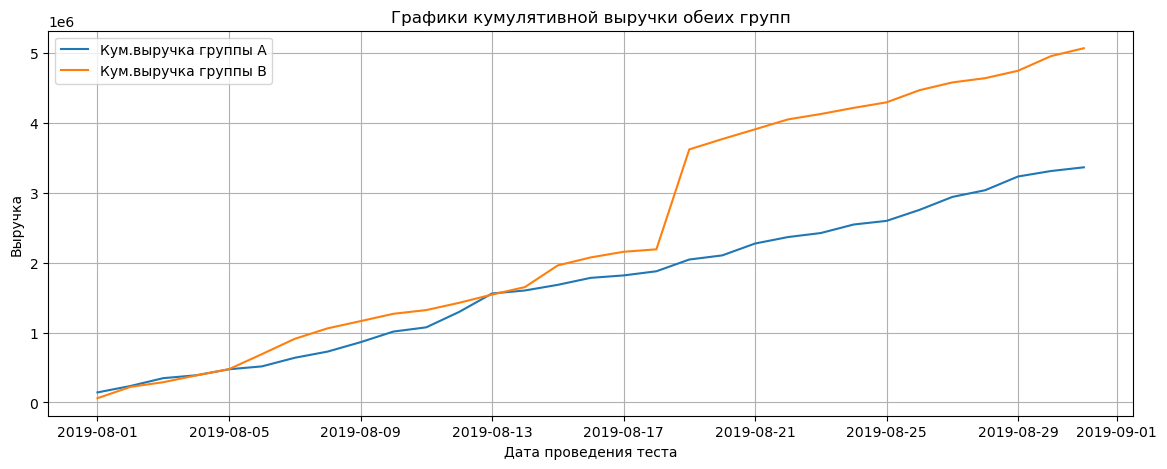

In [39]:
#построим графики кум. выручки обеих групп
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

register_matplotlib_converters()

plt.figure(figsize=(14,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кум.выручка группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кум.выручка группы B')
plt.title('Графики кумулятивной выручки обеих групп')
plt.ylabel('Выручка')
plt.xlabel('Дата проведения теста')
plt.grid()
plt.legend() ;

По графику видно, что в первой половине месяца выручка в группе "B" растёт немного быстрее, чем в "A". 13 августа выручки примерно одинаковы. Во второй половине месяца все очевидно - группа "B" однозначно лидер, её выручка значительно больше. Но нужно отметить сильный всплеск выручки в группе "B" 19 августа, предположительно это были крупные заказы, а без этой аномалии, по графикам можно предположить, что выручки росли примерно одинаково или же в этот день было очень много заказов.

In [40]:
#Посмотрим какие аномалии и были ли они в 20х числах августа
cumulativeRevenueB.query('"2019-08-17" <= date <="2019-08-21"')

,date,revenue,orders
33,2019-08-17,2155542,320
35,2019-08-18,2190865,327
37,2019-08-19,3620785,348
39,2019-08-20,3768059,368
41,2019-08-21,3908406,380


In [41]:
print('Медианное значение одного заказа 19 августа :', orders.query(' date == "2019-08-19" ')['revenue'].median())
orders.query(' date == "2019-08-19" ').sort_values(by='revenue', ascending=False).head(10)

Медианное значение одного заказа 19 августа : 2578.0


,transactionId,visitorId,date,revenue,group
365,590470918,1920142716,2019-08-19,1294500,B
453,3970235543,2912540959,2019-08-19,43990,A
450,1570513684,2837914161,2019-08-19,33405,B
361,3765974140,1357170471,2019-08-19,31680,A
393,2683113224,154576532,2019-08-19,26550,B
316,3268879337,2536252163,2019-08-19,20026,B
314,2037051350,1957949546,2019-08-19,16770,A
395,4170537404,290022471,2019-08-19,16480,B
454,4016435970,4017075195,2019-08-19,13390,A
270,3412626998,3282099314,2019-08-19,11985,A


Вот и найдена аномалия - был один заказ №425 на чуть менее 1,3млн в группе "B" 19 августа - в то время как остальные заказы не больше 44 тысяч. Так как этот заказ один, то его в принципе можно считать выбросом и при дальнейшем анализе это надо учитывать

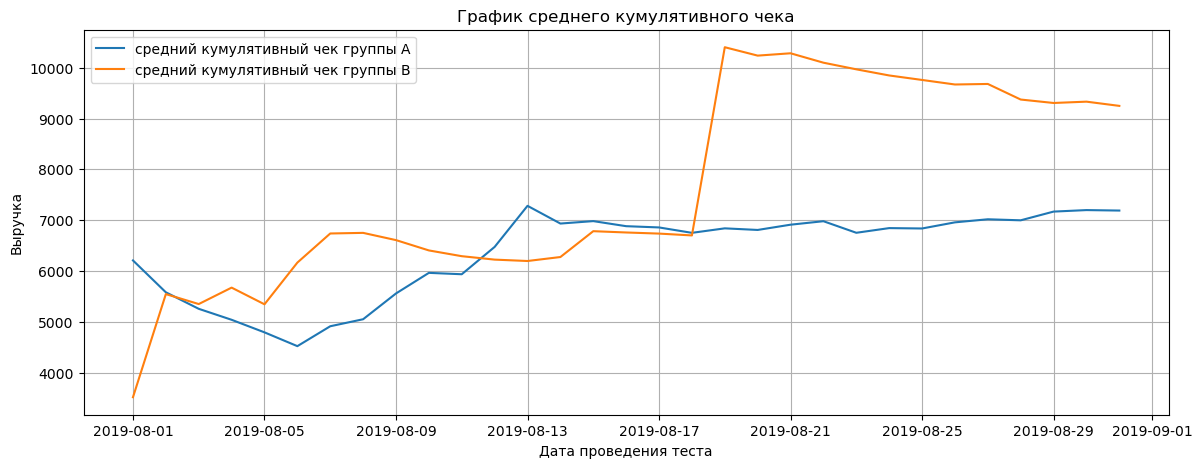

In [42]:
#построим графики среднего кумулятивного чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(14,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='средний кумулятивный чек группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='средний кумулятивный чек группы B')
plt.title('График среднего кумулятивного чека')
plt.ylabel('Выручка')
plt.xlabel('Дата проведения теста')
plt.legend() ;

По графику видно, как в первой половине в группе "B" чек преимущественно больше, но есть и исключение в датах, где чек больше в "A" - это начало 1 августа и 12-14 августа. Далее чек группы "B" снова больше. Но также на графике видно сильное влияние на ср.чек аномального заказа №425, кстати после этого заказа средний чек в "B" постепенно пошел снижаться, в то время как в "A" он с 18 августа ну очень медленно растет

<b>Построим график относительного изменения кумулятивного среднего чека группы B к группе A</b>

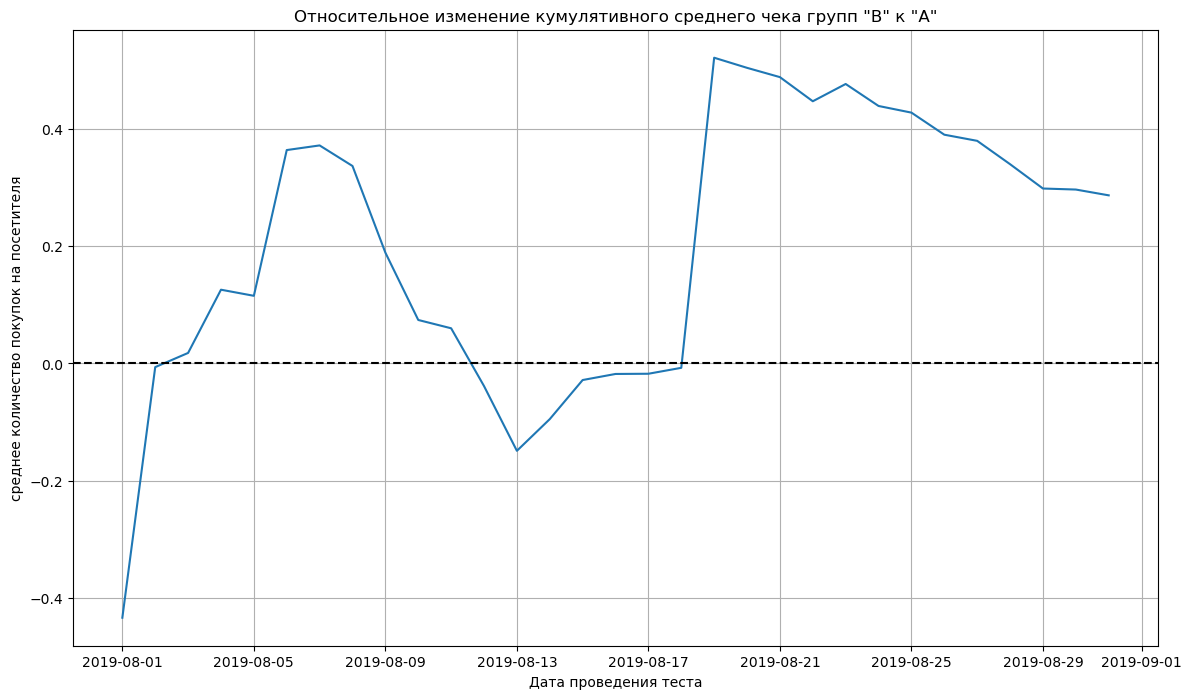

In [43]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(14,8))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека групп "B" к "А"')
plt.ylabel('среднее количество покупок на посетителя')
plt.xlabel('Дата проведения теста')
plt.axhline(y=0, color='black', linestyle='--') ;

Средний чек "B" рос с 1 августа, а 2 августа уже превысил "A" и рос до 7 августа. 7-8 пошло обратное движение до 13 августа, примечательно, что 3 дня 12-14 акгуста средний чек "A" был больше "B". Но недолго, с 13 чек "B" опять начал расти и уже 15 августа наступил переломный момент и на следующий день чек "B" оказался больше и находился больше "A" до конца месяца. Здесь хорошо видно, что 19 августа был сильный рост за счет аномального заказа с большим объемом, а в последующие дни средний чек "B" также постепенно снижался.

<b>Построим график кумулятивного среднего количества заказов на посетителя по группам. </b>

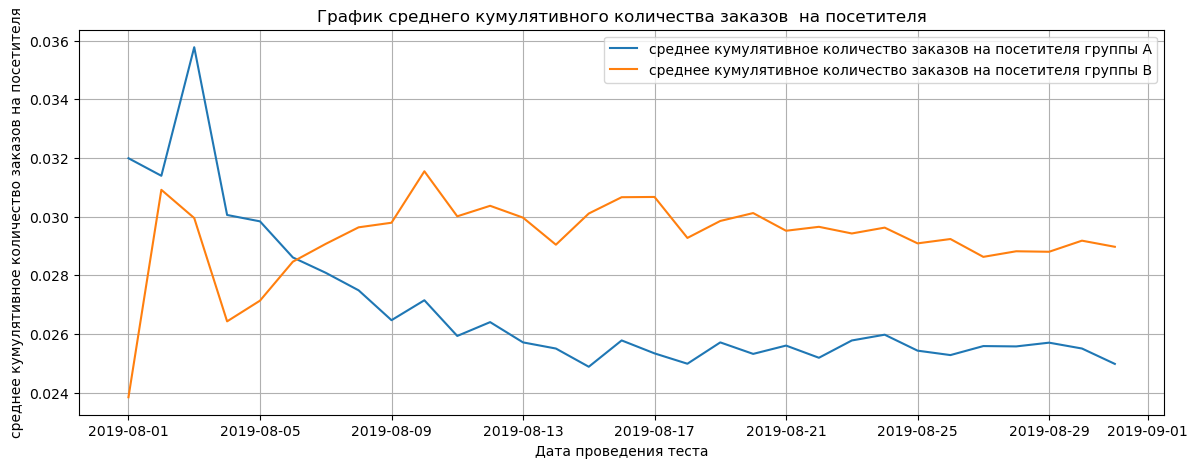

In [44]:
#построим график среднего кумулятивного количества заказов  на посетителя
cumulativeOrdersA = cumulativeData[cumulativeData['group']=='A'][['date', 'orders', 'visitors']]
cumulativeOrdersB = cumulativeData[cumulativeData['group']=='B'][['date', 'orders', 'visitors']]

register_matplotlib_converters()

plt.figure(figsize=(14,5))
plt.plot(cumulativeOrdersA['date'], cumulativeOrdersA['orders']/ cumulativeOrdersA['visitors'], label='среднее кумулятивное количество заказов на посетителя группы A')
plt.plot(cumulativeOrdersB['date'], cumulativeOrdersB['orders']/ cumulativeOrdersB['visitors'], label='среднее кумулятивное количество заказов на посетителя группы B')
plt.title('График среднего кумулятивного количества заказов  на посетителя')
plt.ylabel('среднее кумулятивное количество заказов на посетителя')
plt.xlabel('Дата проведения теста')
plt.grid()
plt.legend() ;

По графику видно, что в начале месяца группа А лидировала в этом показателе, но в числа с 5-7 августа ситуация изменилась кардинальным образом и уже группа В начала лидировать в этом показателе, имея существенное преимущество вплоть до конца месяца.

<b> Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.</b> 

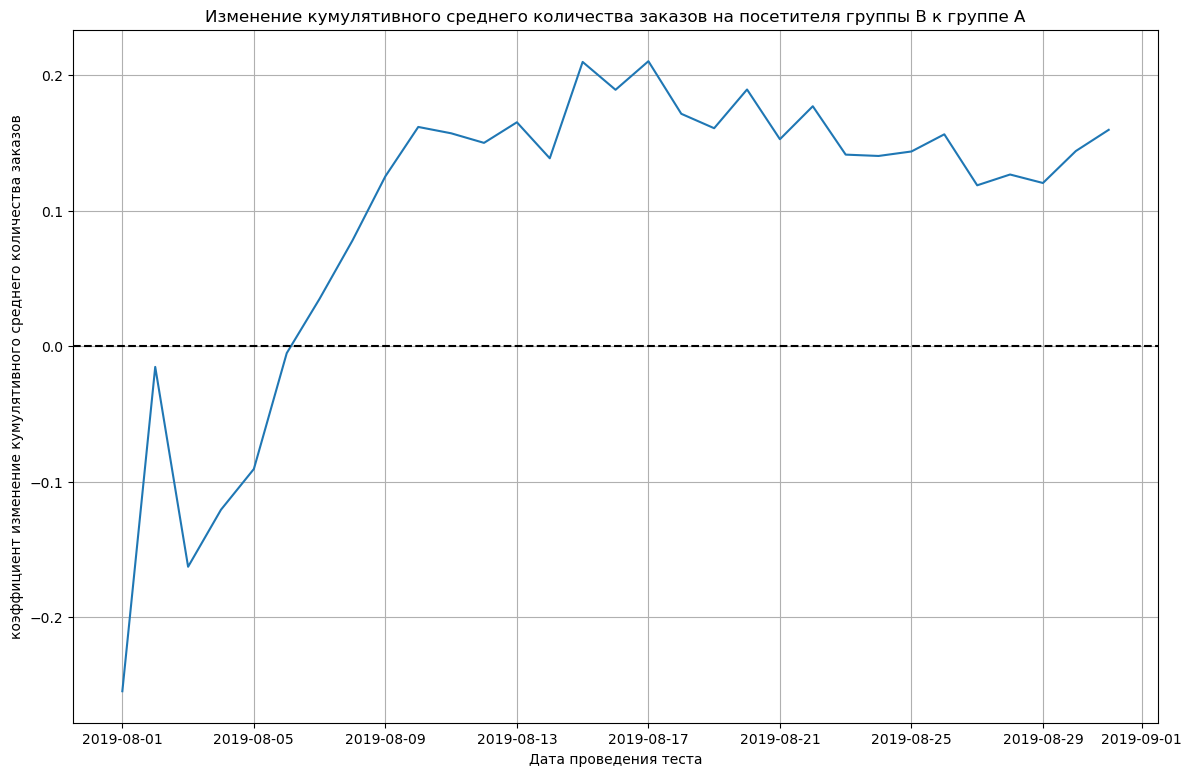

In [45]:
mergedCumulativeOrders = cumulativeOrdersA.merge(cumulativeOrdersB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(14,9))
plt.grid()
plt.plot(mergedCumulativeOrders['date'], (mergedCumulativeOrders['ordersB']/mergedCumulativeOrders['visitorsB'])/(mergedCumulativeOrders['ordersA']/mergedCumulativeOrders['visitorsA'])-1)
plt.title('Изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('коэффициент изменение кумулятивного среднего количества заказов')
plt.xlabel('Дата проведения теста')
plt.axhline(y=0, color='black', linestyle='--') ;

Здесь нужно отметить, что 2 августа был сильный рос среднего количества заказов на посетителя в обоих группах,возможно повлияли какие-любо скидки и т.п. Начиная с 5 августа группа "B" начала подъем и уже с 6-ого лидировала до конца периода: её коэффициент изменение кумулятивного среднего количества заказов на посетителя группы B к группе A рос до 15 августа и разница с "A" на максимуме составила 21%, затем пошло постепенное снижение до 10%-14%.

<b>Построим точечный график количества заказов по пользователям.</b>

In [46]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,3797467345,1196621759,2019-08-15,9759,B
3,2282983706,2322279887,2019-08-15,2308,B
4,182168103,935554773,2019-08-15,2210,B


In [47]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False). \
                                                                        agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


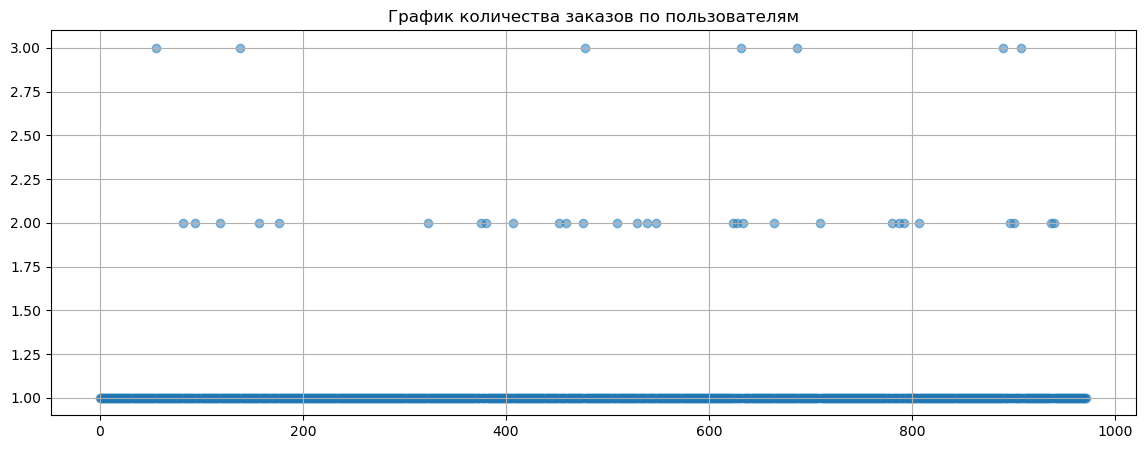

In [48]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(14,5))
plt.grid()
plt.title('График количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5) ;

Бросается в глаза то, что большое количество пользователей совершили 1 заказ. Тех же, кто совершил 2 заказа заметно меньше. А вот уже тех, кто совершил 3 заказа совсем мало, и считать ли это выбросами пока не понятно - для начала нужно посчитать процентили (95 и 99). И все, что выше 3 заказов - явно аномалия.

<b>Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.</b>

In [49]:
print('Рассчитаем 95 и 99 перцентили по заказам : ', np.percentile(ordersByUsers['orders'], [95, 99])) 

Рассчитаем 95 и 99 перцентили по заказам :  [1. 2.]


In [50]:
#расширим расчеты и посмотрим более подробно, для большей точности и уверенности расчитаем большее количество процентилей
print('перцентили c 95 по 99 (по заказам): ', np.percentile(ordersByUsers['orders'], [95,96,97,98,99])) 

перцентили c 95 по 99 (по заказам):  [1. 1. 2. 2. 2.]


Теперь очевидно, что большинство(98%) пользователей делают 1 или 2 заказа. Всё что выше этих значений - это аномалия.  3 - нужно установить в качестве границы для аномалий.

<b>Построим точечный график стоимостей заказов.</b>

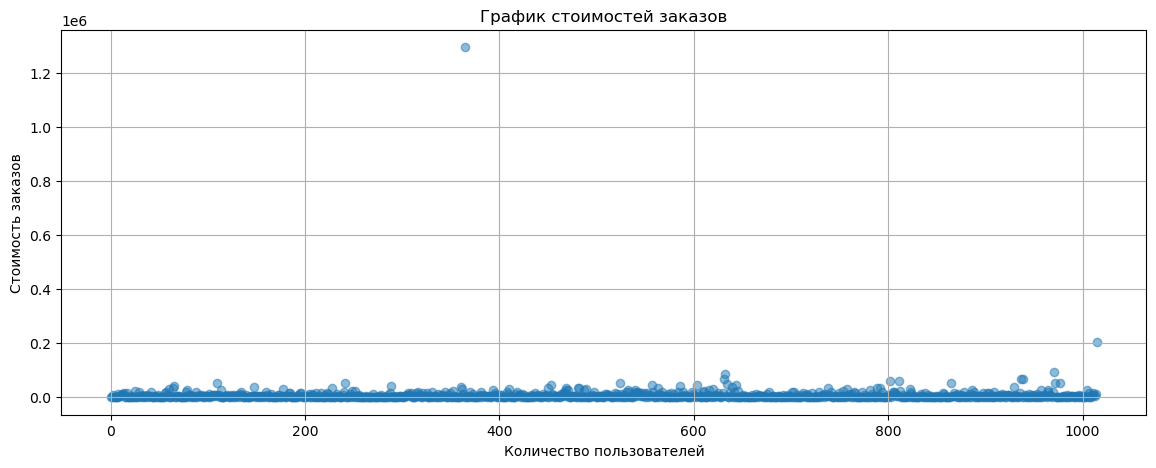

In [51]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(14,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество пользователей')
plt.scatter(x_values, orders['revenue'], alpha=0.5) ;

Нужно построить более наглядный график, для этого и уберем явные выбросы с 'revenue' большим 190000:

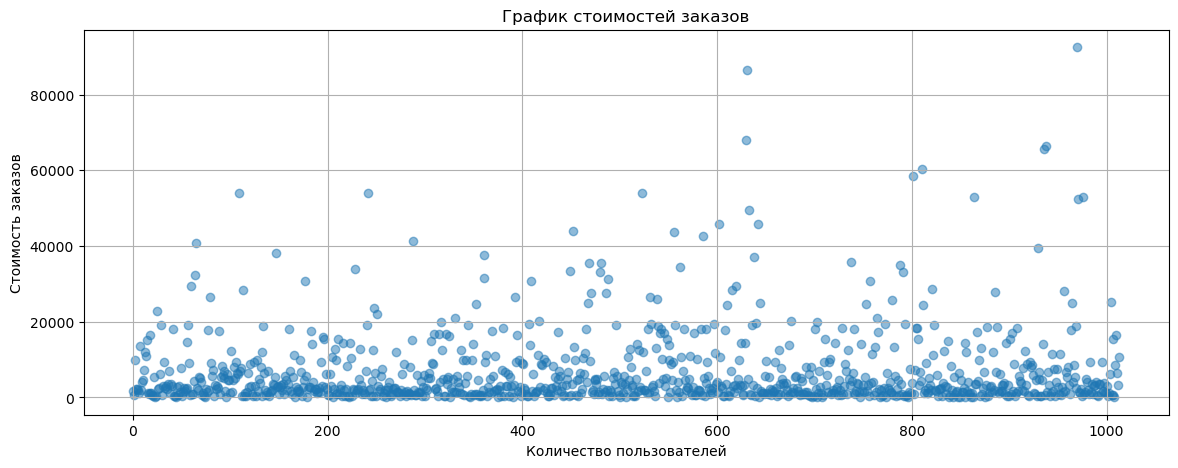

In [52]:
new_orders = orders[orders['revenue']<=190000]['revenue']
xn_values = pd.Series(range(0, len(new_orders)))
plt.figure(figsize=(14,5))
plt.grid()
plt.scatter(xn_values, new_orders, alpha=0.5)
plt.title('График стоимостей заказов')
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество пользователей');

Сразу видно, что тот самый аномальный заказ на 1.3 млн и еще один на примерно 200 тыс, остальные примерно не больше 100 тыс. Для того, чтобы найти более точную границу аномальных заказов рассчитаем процентили

<b>Посчитаем 95-й и 99-й перцентили стоимости заказов:</b>

In [53]:
print('Расчитаем 95 и 99 перцентили стоимости заказов:', np.percentile(orders['revenue'], [95, 99]))

Расчитаем 95 и 99 перцентили стоимости заказов: [26785. 53904.]


Получается, что 99% заказов меньше суммы 58233.2 - нужно установить её в качестве границы для аномалий.

<b>Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. </b>

<p>Сформулируем гипотезы.</p> 
<b>Нулевая:</b> различий в среднем количестве заказов между группами нет. 
<p><b>Альтернативная:</b> различия в среднем между группами есть.</p>

In [54]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [55]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,3797467345,1196621759,2019-08-15,9759,B
3,2282983706,2322279887,2019-08-15,2308,B
4,182168103,935554773,2019-08-15,2210,B


In [56]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
 
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
 
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
 
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
 
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
 
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
 
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
 
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
 
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
 
print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01  23              142779           17               
1 2019-08-02  19              91602            23               
2 2019-08-03  24              112473           14               
3 2019-08-04  11              41176            14               
4 2019-08-05  22              86383            21               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  59758            23                  142779                
1  162043           42                  234381                
2  67049            66                  346854                
3  96890            77                  388030                
4  89908            99                  474413                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  17                  59758                719                
1  40                  221801               619                
2  54                  288850         

Посмотрим на кол-во пользователей каждой из групп

In [79]:
a = visitors[visitors['group'] == 'A']['visitors'].sum()
a

18736

In [80]:
b = visitors[visitors['group'] == 'B']['visitors'].sum()
b

18916

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'transactionId']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 


In [57]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
 
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [58]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
 
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
 
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
 
print("Относительное изменение метрики: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.011
Относительное изменение метрики: 0.160


<b>Подвывод:</b> По «сырым» данным различия в конверсии групп A и B есть.
Первое число — p-value = 0.017 и это меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет - отвергаем. Однако относительный проигрыш группы B равен 13.8% — второе число в выводе.

<b>Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным</b>

<p>Для того, чтобы рассчитать статистическую значимость различий в среднем чеке между группами - нужно передать критерию mannwhitneyu() данные о выручке с заказов. А также найдём относительные различия в среднем чеке между группами.</p>
<p><b> Нулевая гипотеза:</b> "Cтатистически значимых различий в средних чеках между группами нет" </p>
<b> Альтернативная гипотеза:</b> "Cтатистически значимые различия есть."

In [59]:
print('Значение p-value, ', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное изменение метрики: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Значение p-value,  0.829
Относительное изменение метрики: 0.287


P-value = 0.729, что значительно больше 0.05. Следовательно, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия - нет. Средний чек группы B выше среднего чека группы A

<b>Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. </b>

In [60]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Всего необычных пользователей =" ,len(abnormalUsers)) 

937    148427295
33     249864742
58     611059232
811    887908475
632    888512513
dtype: int64
Всего необычных пользователей = 16


In [75]:
#относительные потери
relativUsers = round(((len(abnormalUsers) / orders['visitorId'].nunique()) * 100), 2)
relativUsers

1.64

Потери пользователей после фильтрации в относительном выражении составили 1.64% 

Далее нужно узнать, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным:

In [62]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0)

Дальше нужно применить статистический критерий Манна-Уитни к полученным выборкам.

<p><b>Нулевая гипотеза: </b>"Статистически значимых различий в конверсии между группами нет"<p>
<b>Альтернативная гипотеза:</b> "Cтатистически значимые различия есть."

In [63]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.007
Относительный показатель 'B' и 'A' = 0.189


<b>Подвывод:</b> p-value = 0.01 меньше 0.05. Следовательно, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - отвергаем. А также это означает: и по «очищенным» данным различия в конверсии групп A и B есть. А относительный выигрыш группы "B" над "A" равен 17,4% (выше, чем с «сырыми» данными - 13.8%)

</b>Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. </b>

<b>Нулевая гипотеза:</b> "Статистически значимых различий в средних чеках между группами нет" 
<p><b>Альтернативная гипотеза: </b>"Статистически значимые различия есть."</p>

In [64]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

alpha = 0.05
p-value = 0.788
Относительный показатель 'B' и 'A' = -0.032


P-value значительно больше 0.05.Следовательно, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия - тоже нет. А средний чек группы B оказался незначительно и на 2% ниже среднего чека группы A, в то время как по "сырым" данным, он был больше на целых 26% - и всё это из-за одного того же аномального заказа на 1,3 млн 

<b>В результате тестирования выявлено:</b>

Получилось, что и по "сырым" и по "очищенным" данным отличия в средних чеках групп A и B отстутствуют, и это несмотря на то, что средний чек группы B оказался незначительно и на 2% ниже среднего чека группы A, в то время как по "сырым" данным, он был больше на целых 26% - и всё это из-за одного того же аномального заказа на 1,3 млн. Всё это логично - аномальный заказ убрали и чеки сравнялись.

<b>Результаты тестирования довольно однозначны. По итогу можно смело принять решение остановить тестирование и констатировать успех и победу группы B: группа B значительно эффективнее группы A, хоть по среднему чеку группы оказались примерно равны.<b>